In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
mnist = fetch_openml('mnist_784', parser='auto')
for key in mnist:
    print (key)

data
target
frame
categories
feature_names
target_names
DESCR
details
url


In [20]:
X, y = np.array(mnist['data']), np.array(mnist['target'])
print(X.shape, y.shape)

(70000, 784) (70000,)


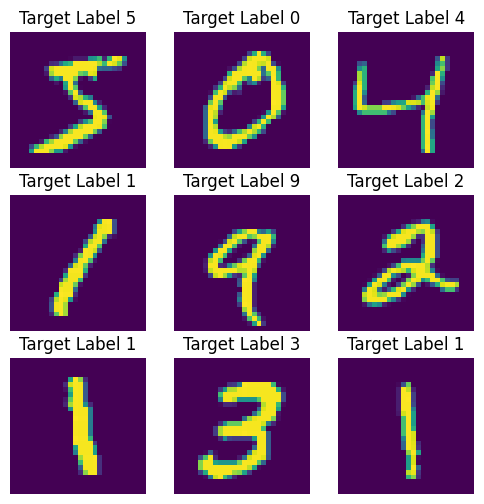

In [21]:
fig = plt.figure( figsize=(6,6) )
for i in range(9):
    image = X[i]
    image_pixels = image.reshape(28,28)
    plt.subplot(3,3,i+1)
    plt.imshow(image_pixels)
    plt.title(f'Target Label {y[i]}', fontsize=12)
    plt.axis('off')

In [22]:
scaler_train = StandardScaler()
scaler_train.fit(X)
X = scaler_train.transform(X)

In [23]:
pca = PCA(0.95)
pca.fit(X)
X_pca_reduceddimension = pca.transform(X)
pca.n_components_

332

In [24]:
X_pca_reduceddimension.shape

(70000, 332)

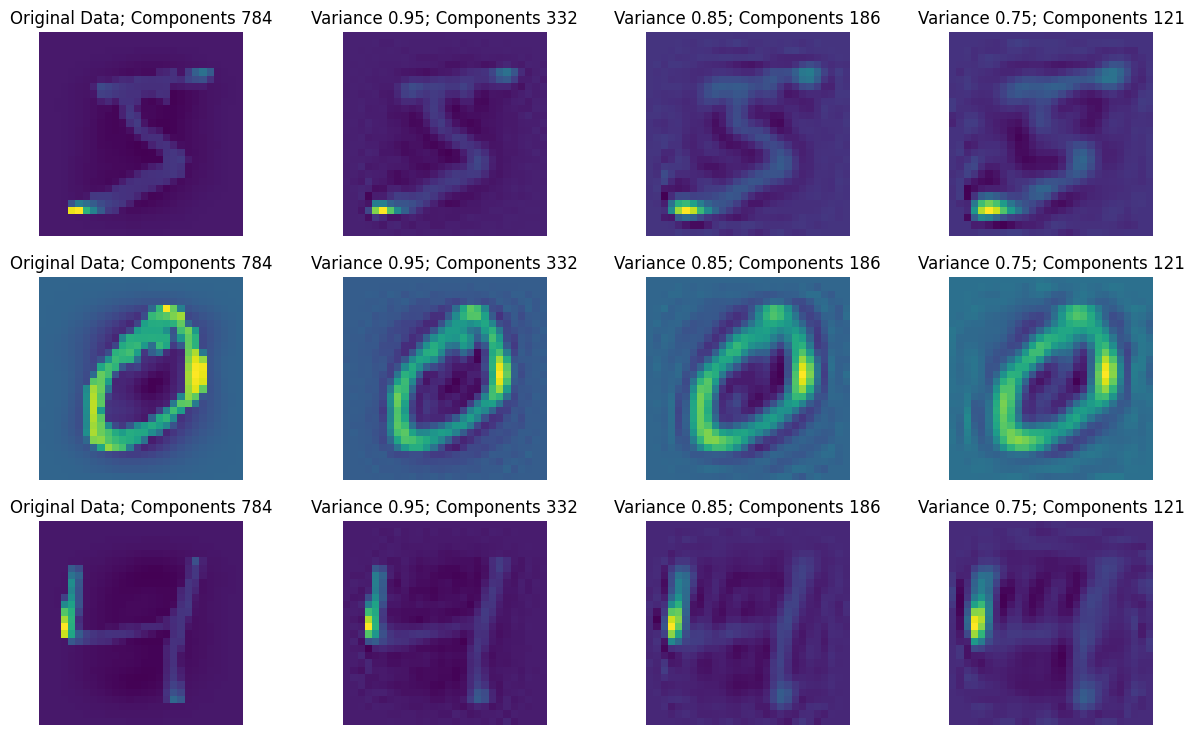

In [25]:
fig = plt.figure(figsize=(15,9))
m = 0
for i in range(3):
    for j in [1, 0.95, 0.85, 0.75]:
        m += 1
        pca = PCA(j)
        pca.fit(X)
        X_pca = pca.transform(X)
        components = pca.n_components_
        X_approx = pca.inverse_transform(X_pca)
        plt.subplot(3,4,m)
        if j == 1:
            image = X[i]
            plt.title(f'Original Data; Components 784')
        else: 
            image = X_approx[i]
            plt.title(f'Variance {j}; Components {components}')
        image_pixels = image.reshape(28,28)
        plt.axis('off')
        plt.imshow(image_pixels)